# Allgemeine Relativitätstheorie mit dem Computer 
# General Theory of Relativity on the Computer

## Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main (Sommersemester 2021)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 04.04.2021


## Erster Vorlesungsteil: Allgemeine Relativitätstheorie mit Python


In diesem Python Jupyter Notebook werden die grundlegenden Größen der allgemeinen Relativitätstheorie (z.B. die Metrik der Raumzeit, Christoffel Symbole, Ricci- und Einstein-Tensor) am Beispiel einer allgemeinen statischen und isotropen Raumzeit in Python berechnet. Die oft komplizierten und zeitaufwendigen Berechnungen der tensoriellen Gleichungen der allgemeinen Relativitätstheorie können mithilfe von Computeralgebra-Systemen erleichtert werden. Diverse Anwendungen der Einstein- und Geodätengleichung sind in schon vordefinierten Python Modulen implementiert,  und analytische Berechnungen können durchgeführt und entsprechende Lösungen berechnet und visualisiert werden.

Es werden zwei unterschiedliche Python Module (<A href="https://pypi.org/project/GraviPy/" target="_blank">GraviPy</A> und <A href="https://einsteinpy.org/" target="_blank">EinsteinPy</A>) vorgestellt, mit denen man die Berechnungen durchführen kann. Beide Module basieren auf dem Modul <A href="https://www.sympy.org/en/index.html" target="_blank">SymPy</A> welches symbolische Berechnungen mit Python vereinfacht.

## Grundlegende Größen der Allgemeinen Relativitätstheorie mit GraviPy

Im Folgenden werden einige grundlegende Größen der allgemeinen Relativitätstheorie am Beispiel der allgemeinen statischen, isotropen Metrik erläutert. Zunächst wird das Python-Paket "GraviPy" eingebunden, welches auf dem Paket SymPy basiert und symbolische Berechnungen in der Allgemeinen Relativitätstheorie relativ einfach möglich macht. GraviPy kann einfach mit "pip install gravipy" in einem Terminal installiert werden und stellt zusammen mit dem Modul SymPy ein wichtiges Tool der Computer Algebra Systeme im Bereich der allgemeinen Relativitätstheorie dar. Falls Probleme bei der Installation auftreten kann man sich das Modul (GraviPy-0.2.0.tar.gz) auch alternativ unter <A href="https://pypi.org/project/GraviPy/#files" target="_blank">GraviPy: Dowload files</A> herunterladen. 
Das offizielle GraviPy-Tutorium (<A href="https://itp.uni-frankfurt.de/~hanauske/VARTC/VARTCorona/python/GraviPy-tutorial.html" target="_blank">GraviPy-tutorial.ipynb</A>) finden sie unter <A href="https://github.com/wojciechczaja/GraviPy" target="_blank">github.com/wojciechczaja/GraviPy</A>.

In [1]:
from gravipy.tensorial import * 
from sympy import init_printing
init_printing()

Definition der Koordinaten und der kovarianten Raumzeit-Metrik einer allgemeinen statischen, isotropen Metrik:

$$x^\mu=(t,r,\theta,\phi)\quad, \qquad g_{\mu\nu}=\left( \begin{array}{ccc} A(r) & 0 & 0 & 0\\ 0&  -B(r)&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right)$$
, bzw. auskommentiert, Schwarzschildmetrik:
$$ g_{\mu\nu}=\left( \begin{array}{ccc} 1-\frac{2\,M}{r} & 0 & 0 & 0\\ 0&  -\frac{1}{1-\frac{2\,M}{r}}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right)$$


In [2]:
t, r, theta, phi, M = symbols('t, r, theta, phi, M')
A = Function('A')(r)
B = Function('B')(r)
# create a coordinate four-vector object instantiating 
# the Coordinates class
x = Coordinates('x', [t, r, theta, phi])
# define a matrix of a metric tensor components
#Metric = diag((1-2*M/r), -1/(1-2*M/r), -r**2, -r**2*sin(theta)**2)
Metric = diag(A, -B, -r**2, -r**2*sin(theta)**2)
# create a metric tensor object instantiating the MetricTensor class
g = MetricTensor('g', x, Metric)

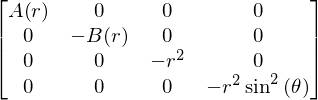

In [3]:
g(All, All)

Kontravariante Form der Metrik: 

$$ g^{\mu\nu}=\left( \begin{array}{ccc} \frac{1}{A(r)} & 0 & 0 & 0\\ 0&  -\frac{1}{B(r)}&  0&0 \\ 0&  0&  -\frac{1}{r^2}& 0\\ 0&  0&  0& -\frac{1}{r^2 \hbox{sin}^2(\theta)}\\ \end{array} \right)$$

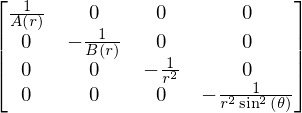

In [4]:
g(-All, -All)

Partielle Ableitung: 
$$\partial_\mu = \frac{\partial}{\partial x^\mu}$$
Hier speziell $\partial_2 g_{1 1} = \partial_r g_{t t}$, wobei
$$ g_{\mu\nu| \alpha} := \partial_\alpha g_{\mu\nu} = \frac{\partial }{\partial x^\alpha}g_{\mu\nu} $$

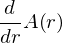

In [5]:
g.partialD(1, 1, 2)

.bzw

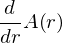

In [6]:
g(1,1).diff(x(-2))

Die Chistoffel Symbole in kovarianter Form (erster Art): 
$$ \Gamma_{\mu \nu \sigma} = \Gamma^{\rho}_{\mu \nu} g_{\rho \sigma} = \frac{1}{2} \left( g_{\nu \sigma| \mu} + g_{\mu \sigma| \nu} - g_{\mu \nu| \sigma} \right)$$

Hier speziell $$ \Gamma_{2 2 2} = \Gamma_{r r r}$$ 

!!!!  Beachte: In GraviPy werden die Raumzeit Indices von 1..4 gezählt  !!!!

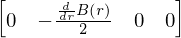

In [7]:
Ga = Christoffel('Ga', g)
Ga(All, 2, 2)

Die kovariante Ableitung eines Tensors zweiter Stufe $T^\mu{}\!_\nu$ ist wie folgt definiert:

$$
\nabla\!_\alpha T^\mu{}\!_\nu = \partial_\alpha T^\mu{}\!_\nu + \Gamma^\mu_{\alpha \rho} T^\rho{}\!_\nu  - \Gamma^\rho_{\alpha \nu} T^\mu{}\!_\rho   
$$

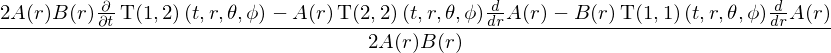

In [8]:
T = Tensor('T', 2, g)
T.covariantD(1,2,1) 
# Beachten Sie, dass die ersten zwei Zahlen die Indices des Tensors 
# und dritte Zahl die Koordinate angibt nach der differenziert wird

Die kovariante Ableitung der Metric $g_{\mu \nu}$ ist identisch 0.

In [9]:
g.covariantD(1,1,2)

Der Riemann Tensor:
$$ R_{\mu \nu \rho \sigma} = \frac{\partial \Gamma_{\mu \nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma_{\mu \nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\nu \sigma}\Gamma_{\mu \rho \alpha} - \Gamma^{\alpha}_{\nu \rho}\Gamma_{\mu \sigma \alpha} - \frac{\partial g_{\mu \alpha}}{\partial x^{\rho}}\Gamma^{\alpha}_{\nu \sigma} + \frac{\partial g_{\mu \alpha}}{\partial x^{\sigma}}\Gamma^{\alpha}_{\nu \rho} $$

Hier speziell $$ R_{1 3 1 3} =  R_{t \theta t \theta} $$

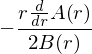

In [10]:
Rm = Riemann('Rm', g)
Rm(1,3,1,3)

Oder in gemischt kontra- kovarianter Form $$ R^{1}{}_{3 1 3} = R^{t}{}_{\theta t \theta}  $$

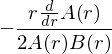

In [11]:
Rm(-1,3,1,3)

Der Ricci Tensor:

$$ R_{\mu \nu} = \frac{\partial \Gamma^{\sigma}_{\ \mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\ \mu \sigma}}{\partial x^{\nu}} + \Gamma^{\sigma}_{\ \mu \nu}\Gamma^{\rho}_{\ \sigma \rho} - \Gamma^{\rho}_{\ \mu \sigma}\Gamma^{\sigma}_{\ \nu \rho} $$

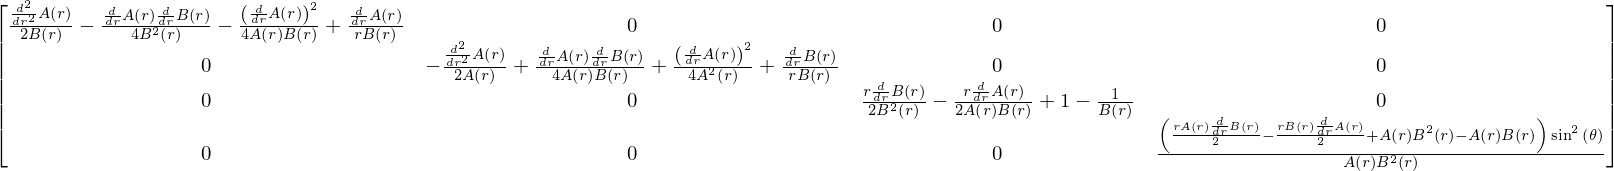

In [12]:
Ri = Ricci('Ri', g)
Ri(All, All)

Der Ricci Tensor lässt sich auch durch folgende Kontraktion aus dem Riemann Tensor berechnen:
$R_{\mu \nu} = R^{\rho}_{\ \mu \rho \nu} $

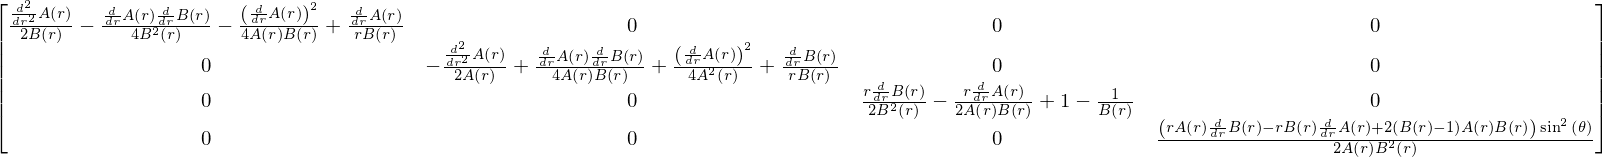

In [13]:
ricci = sum([Rm(i, All, k, All)*g(-i, -k)
             for i, k in list(variations(range(1, 5), 2, True))],
            zeros(4))
ricci.simplify()
ricci

Der Ricci Skalar ergibt sich aus der Kontraktion des Ricci Tensors: $R = R_{\mu}{}^{\! \mu} = g^{\mu \nu}R_{\mu \nu}$

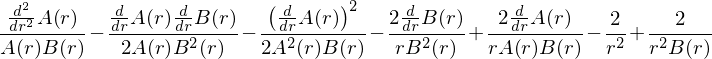

In [14]:
Ri.scalar()

Der Einstein Tensor:$$ G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2}g_{\mu \nu}R $$

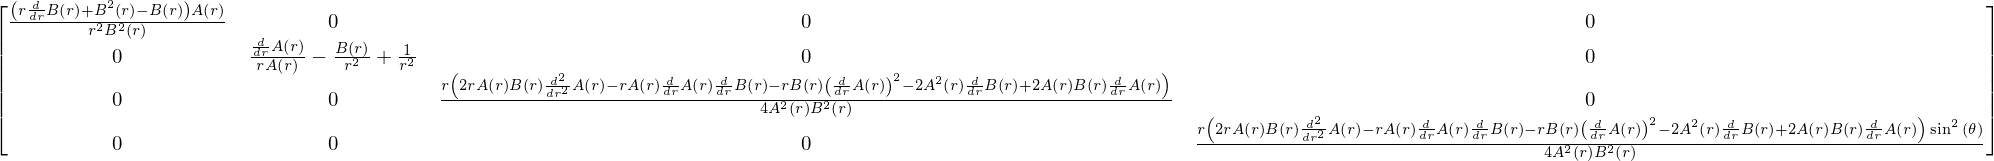

In [15]:
G = Einstein('G', Ri)
G(All, All)

Der Einsteintensor $G_{\mu \nu}$ ist der entscheidende Tensor der allgemeinen Relativit&auml;tstheorie. Die Einsteingleichung (in natürlichen Einheiten c=G=1) lautet

$$
R_{\mu\nu} - \frac{1}{2} g_{\mu\nu} R ~=~ -8 \pi  \, T_{\mu\nu} \quad,
$$
wobei $T_{\mu\nu}$ der Energie-Impuls-Tensor der Materie ist. A. Einstein stellte im Jahre 1915 seine revolutionäre allgemeinen Relativit&auml;tstheorie der wissenschaftlichen Öffentlichkeit vor (siehe <A href="https://echo.mpiwg-berlin.mpg.de/ECHOdocuView?url=/permanent/echo/einstein/sitzungsberichte/199SW1KB/index.meta" target="_blank">Einstein, A. 1915, Preuss. Akad.Wiss. Berlin, Sitzungsber., 778-786.</A> und <A href="https://echo.mpiwg-berlin.mpg.de/ECHOdocuView?url=/permanent/echo/einstein/sitzungsberichte/4VUNPPBW/index.meta" target="_blank">Einstein, A. 1915, Preuss. Akad.Wiss. Berlin, Sitzungsber., 844-847.</A>). Seine Feldgleichungen leitete er mittels eines allgemeinen Kovarianzprinzips her und über seine neue Theorie schrieb er selbst "Dem Zauber der Theorie wird sich kaum jemand entziehen können, der sie wirklich erfasst hat;...".

Die Schönheit der Einstein Gleichung liegt neben ihrem zugrunde liegenden Kovarianzprinzip in der Einfachheit ihrer fundamentalen Aussage. Nach Einstein verbiegt jede Energieansammlung (Energie-Impuls-Tensor, rechte Seite der Gleichung) die Struktur der Raumzeit (Einstein Tensor, linke Seite der Gleichung) und diese gekrümmte Raumzeit ist der ursächliche Grund der Gravitation. Nach Einstein fällt der Apfel vom Baum zu Boden, da der große Energiegehalt der Erde die raumzeitliche Struktur so stark verbiegt, dass der Apfel sich in dieser gekrümmten Raumzeit nach geodätischen Gesetzen zu Boden bewegen muss.

## Grundlegende Größen der Allgemeinen Relativitätstheorie mit EinsteinPy

Im Folgenden werden einige grundlegende Größen der allgemeinen Relativitätstheorie mit dem Python Modul "EinsteinPy" berechnet. Wieder erläutern wir dies am Beispiel der allgemeinen statischen, isotropen Metrik. Zunächst wird das Python Modul "EinsteinPy" eingebunden, welches auf dem Modul SymPy basiert und symbolische Berechnungen in der Allgemeinen Relativitätstheorie relativ einfach möglich macht. EinsteinPy kann einfach mit "pip install einsteinpy" in einem Terminal installiert werden und stellt zusammen mit dem Modul SymPy ein wichtiges Tool der Computer Algebra Systeme im Bereich der allgemeinen Relativitätstheorie dar. Weiteres über das Modul finden Sie unter <A href="https://docs.einsteinpy.org/en/stable/" target="_blank">EinsteinPy - Making Einstein possible in Python</A>.

In [16]:
from sympy import *
init_printing()
from einsteinpy.symbolic import *

Definition der Koordinaten und der kovarianten Raumzeit-Metrik einer allgemeinen statischen, isotropen Metrik:

$$x^\mu=(t,r,\theta,\phi)\quad, \qquad g_{\mu\nu}=\left( \begin{array}{ccc} A(r) & 0 & 0 & 0\\ 0&  -B(r)&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right)$$
, bzw. auskommentiert, Schwarzschildmetrik:
$$ g_{\mu\nu}=\left( \begin{array}{ccc} 1-\frac{2\,M}{r} & 0 & 0 & 0\\ 0&  -\frac{1}{1-\frac{2\,M}{r}}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right)$$

In [17]:
t, r, theta, phi = symbols('t, r, theta, phi')
A = Function('A')(r)
B = Function('B')(r)
Metric = diag(A, -B, -r**2, -r**2*sin(theta)**2).tolist()
#M = symbols('M')
#Metric = diag((1-2*M/r), -1/(1-2*M/r), -r**2, -r**2*sin(theta)**2).tolist()
g = MetricTensor(Metric, [t, r, theta, phi])

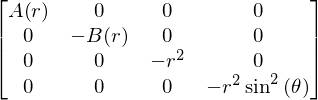

In [18]:
g.tensor()

Durch den Befehl ".config" kann man herausfinden ob der Tensor kovariante (l) oder kontravariante (u) Index-Komponenten hat.

In [19]:
g.config

'll'

Kontravariante Form der Metrik: 

$$ g^{\mu\nu}=\left( \begin{array}{ccc} \frac{1}{A(r)} & 0 & 0 & 0\\ 0&  -\frac{1}{B(r)}&  0&0 \\ 0&  0&  -\frac{1}{r^2}& 0\\ 0&  0&  0& -\frac{1}{r^2 \hbox{sin}^2(\theta)}\\ \end{array} \right)$$

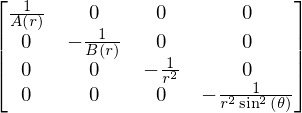

In [20]:
gInv=g.inv()
gInv.tensor()

Wir überprüfen dies, indem wir diese kontravariante Form der Metrik zweifach mit der ursprünglichen Metrik kontrahieren:$$g^{\alpha\beta} \, g_{\alpha\mu} \, g_{\beta\nu} = g_{\mu\nu}$$

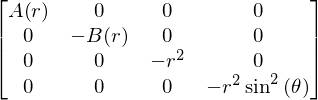

In [21]:
tens1=tensorproduct(gInv.tensor(),g.tensor(),g.tensor())
tensorcontraction(tens1, (0, 2),(1,4))

Man kann die Art der Indices auch einfach mit dem Befehl "change_config" verändern:

In [22]:
gInv.config

'uu'

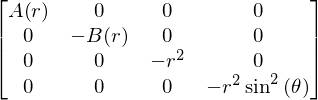

In [23]:
gInv.change_config('ll').tensor()

Das kontrahierte Tensorprodukt der kovarianten Metrik mit der kontravarianten Metrik ergibt die vierdimensionale Einheitsmatrix:

$$g^{\mu\alpha} \, g_{\alpha\nu} = \eta^{\mu}\,_{\!\!\nu} = \delta^{\mu}\,_{\!\!\nu} = \left( \begin{array}{ccc} 1 & 0 & 0 & 0\\ 0&  1&  0&0 \\ 0&  0&  1& 0\\ 0&  0&  0& 1\\ \end{array} \right)$$

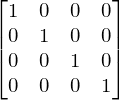

In [24]:
eta=tensorproduct(g.tensor(),gInv.tensor())
tensorcontraction(eta, (1, 2))

Partielle Ableitung: 
$$\partial_\mu = \frac{\partial}{\partial x^\mu}$$
Hier speziell $\partial_2 g_{1 1} = \partial_r g_{t t}$, wobei
$$ g_{\mu\nu| \alpha} := \partial_\alpha g_{\mu\nu} = \frac{\partial }{\partial x^\alpha}g_{\mu\nu} $$

!!!!  Beachte: In EinsteinPy werden die Raumzeit Indices von 0..3 gezählt  !!!!

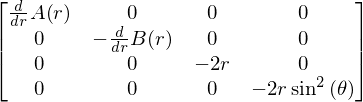

In [25]:
diff(g.tensor(),r)

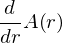

In [26]:
diff(g.tensor(),r)[0,0]

Die Chistoffel Symbole (zweiter Art): 
$$ \Gamma^{\sigma}_{\mu \nu} = \frac{1}{2}g^{\sigma \alpha} \left( g_{\nu \alpha| \mu} + g_{\mu \alpha| \nu} - g_{\mu \nu| \alpha} \right)$$

Hier speziell $$ \Gamma^{1}_{1 1} = \Gamma^{r}_{r r}$$

ull


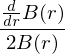

In [27]:
chr = ChristoffelSymbols.from_metric(g)
print(chr.config)
chr.tensor()[1,1,1]

Die Chistoffel Symbole in kovarianter Form (erster Art): 
$$ \Gamma_{\mu \nu \sigma} = \Gamma^{\rho}_{\mu \nu} g_{\rho \sigma} = \frac{1}{2} \left( g_{\nu \sigma| \mu} + g_{\mu \sigma| \nu} - g_{\mu \nu| \sigma} \right)$$

Hier speziell $$ \Gamma_{2 2 2} = \Gamma_{r r r}$$

lll


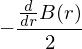

In [28]:
chr_lll = chr.change_config('lll') 
print(chr_lll.config)
chr_lll.tensor()[1,1,1]

Der Riemann Tensor:
$$ R^{\mu}{}\!_{\nu \rho \sigma} = \frac{\partial \Gamma^{\mu}_{\nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma^{\mu}_{\nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\nu \sigma}\Gamma^{\mu}_{\rho \alpha} - \Gamma^{\alpha}_{\nu \rho}\Gamma^{\mu}_{\sigma \alpha} $$

Hier speziell $$ R^{0}{}\!_{2 0 2} =  R^{t}{}\!_{\theta t \theta} $$

ulll


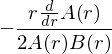

In [29]:
rm = RiemannCurvatureTensor.from_christoffels(chr)
print(rm.config)
rm[0,2,0,2]

Der Riemann Tensor (kovariante Form):
$$ R_{\mu \nu \rho \sigma} = \frac{\partial \Gamma_{\mu \nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma_{\mu \nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\ \nu \sigma}\Gamma_{\mu \rho \alpha} - \Gamma^{\alpha}_{\ \nu \rho}\Gamma_{\mu \sigma \alpha} - \frac{\partial g_{\mu \alpha}}{\partial x^{\rho}}\Gamma^{\alpha}_{\ \nu \sigma} + \frac{\partial g_{\mu \alpha}}{\partial x^{\sigma}}\Gamma^{\alpha}_{\ \nu \rho} $$

Hier speziell $$ R_{1 3 1 3} =  R_{t \theta t \theta} $$

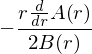

In [30]:
rm_llll = rm.change_config('llll')
rm_llll[0,2,0,2]

Der Ricci Tensor:

$$ R_{\mu \nu} = R^{\sigma}{}\!_{\mu \sigma \nu} = \frac{\partial \Gamma^{\sigma}_{\mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\mu \sigma}}{\partial x^{\nu}} + \Gamma^{\rho}_{\mu \nu}\Gamma^{\sigma}_{\rho \sigma} - \Gamma^{\sigma}_{\mu \rho}\Gamma^{\rho}_{\nu \sigma} $$

ll


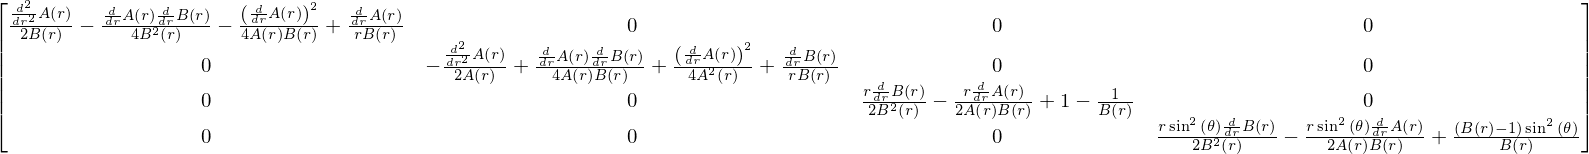

In [31]:
ric = RicciTensor.from_metric(g)
print(ric.config)
ric.tensor()

Überprüfung durch Kontraktion des Riemann Tensors:

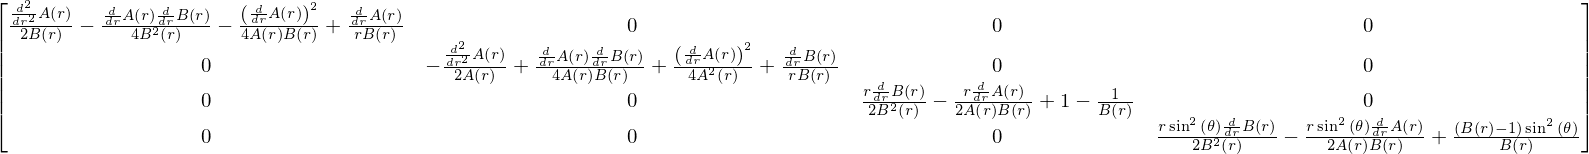

In [32]:
tensorcontraction(rm.tensor(), (0, 2))

Der Ricci Skalar ergibt sich aus der Kontraktion des Ricci Tensors: $R = R^{\mu}{}_{\!\mu} = g^{\mu \nu}R_{\nu \mu}$

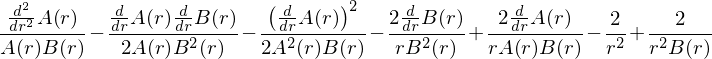

In [33]:
R = RicciScalar.from_riccitensor(ric)
R.tensor()

Überprüfung durch Kontraktion des Ricci Tensors:

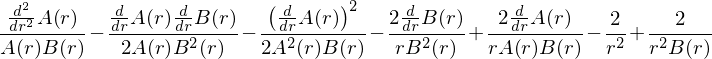

In [34]:
ric_ul = ric.change_config('ul')
tensorcontraction(ric_ul.tensor(), (0, 1))

Der Einstein Tensor:$$ G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2}g_{\mu \nu}R $$

ll


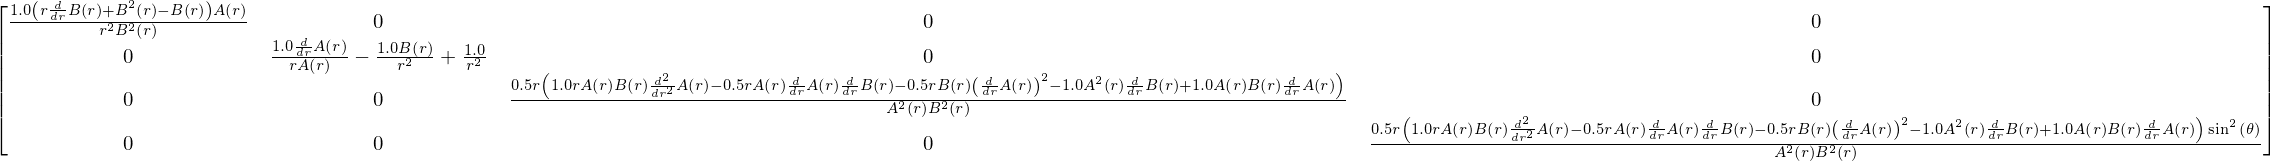

In [35]:
einst = EinsteinTensor.from_metric(g)
print(einst.config)
einst.simplify()

Der Einsteintensor $G_{\mu \nu}$ ist der entscheidende Tensor der allgemeinen Relativit&auml;tstheorie. Die Einsteingleichung (in natürlichen Einheiten c=G=1) lautet

$$
R_{\mu\nu} - \frac{1}{2} g_{\mu\nu} R ~=~ -8 \pi  \, T_{\mu\nu} \quad,
$$
wobei $T_{\mu\nu}$ der Energie-Impuls-Tensor der Materie ist. A. Einstein stellte im Jahre 1915 seine revolutionäre allgemeinen Relativit&auml;tstheorie der wissenschaftlichen Öffentlichkeit vor (siehe <A href="https://echo.mpiwg-berlin.mpg.de/ECHOdocuView?url=/permanent/echo/einstein/sitzungsberichte/199SW1KB/index.meta" target="_blank">Einstein, A. 1915, Preuss. Akad.Wiss. Berlin, Sitzungsber., 778-786.</A> und <A href="https://echo.mpiwg-berlin.mpg.de/ECHOdocuView?url=/permanent/echo/einstein/sitzungsberichte/4VUNPPBW/index.meta" target="_blank">Einstein, A. 1915, Preuss. Akad.Wiss. Berlin, Sitzungsber., 844-847.</A>). Seine Feldgleichungen leitete er mittels eines allgemeinen Kovarianzprinzips her und über seine neue Theorie schrieb er selbst "Dem Zauber der Theorie wird sich kaum jemand entziehen können, der sie wirklich erfasst hat;...".

Die Schönheit der Einstein Gleichung liegt neben ihrem zugrunde liegenden Kovarianzprinzip in der Einfachheit ihrer fundamentalen Aussage. Nach Einstein verbiegt jede Energieansammlung (Energie-Impuls-Tensor, rechte Seite der Gleichung) die Struktur der Raumzeit (Einstein Tensor, linke Seite der Gleichung) und diese gekrümmte Raumzeit ist der ursächliche Grund der Gravitation. Nach Einstein fällt der Apfel vom Baum zu Boden, da der große Energiegehalt der Erde die raumzeitliche Struktur so stark verbiegt, dass der Apfel sich in dieser gekrümmten Raumzeit nach geodätischen Gesetzen zu Boden bewegen muss.